In [46]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [47]:
!kaggle datasets download -d elikplim/car-evaluation-data-set

In [48]:
import zipfile
zip_ref = zipfile.ZipFile('/content/car-evaluation-data-set.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [51]:
data.columns = [['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [52]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [53]:
data['class'].value_counts()

,count
"(class,)",
unacc,1209
acc,384
good,69
vgood,65


In [54]:
data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [55]:
# feature
X = data.drop(['class'],axis=1)

# label
y = data['class']

<ipython-input-55-fef4ca039ab1>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(['class'],axis=1)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
# feature engineering - transforming raw data into useful features to increase predictive power

X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [58]:
!pip install category_encoders

In [59]:
from sklearn.preprocessing import OrdinalEncoder

# Specify the columns to encode
columns_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder on the training data and transform it
X_train[columns_to_encode] = encoder.fit_transform(X_train[columns_to_encode])

# Transform the test data
X_test[columns_to_encode] = encoder.transform(X_test[columns_to_encode])

In [60]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,3.0,0.0,0.0,0.0,2.0,1.0
900,2.0,3.0,1.0,1.0,2.0,2.0
1708,1.0,1.0,3.0,0.0,0.0,0.0
705,0.0,2.0,2.0,0.0,1.0,2.0
678,0.0,2.0,1.0,0.0,1.0,2.0


In [61]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0.0,0.0,2.0,0.0,0.0,1.0
932,2.0,3.0,2.0,1.0,0.0,1.0
628,0.0,0.0,3.0,0.0,0.0,0.0
1497,1.0,0.0,3.0,1.0,1.0,2.0
1262,2.0,1.0,2.0,2.0,1.0,1.0


In [62]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [63]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9595375722543352
[[ 73   1   2   1]
 [  3   9   0   3]
 [  2   0 235   0]
 [  2   0   0  15]]
              precision    recall  f1-score   support

         acc       0.91      0.95      0.93        77
        good       0.90      0.60      0.72        15
       unacc       0.99      0.99      0.99       237
       vgood       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.90      0.86      0.87       346
weighted avg       0.96      0.96      0.96       346



In [66]:
model_100 = RandomForestClassifier(n_estimators=100, random_state=0)
model_100.fit(X_train, y_train)
y_pred = model_100.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [67]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9595375722543352
[[ 73   1   2   1]
 [  3   9   0   3]
 [  2   0 235   0]
 [  2   0   0  15]]
              precision    recall  f1-score   support

         acc       0.91      0.95      0.93        77
        good       0.90      0.60      0.72        15
       unacc       0.99      0.99      0.99       237
       vgood       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.90      0.86      0.87       346
weighted avg       0.96      0.96      0.96       346



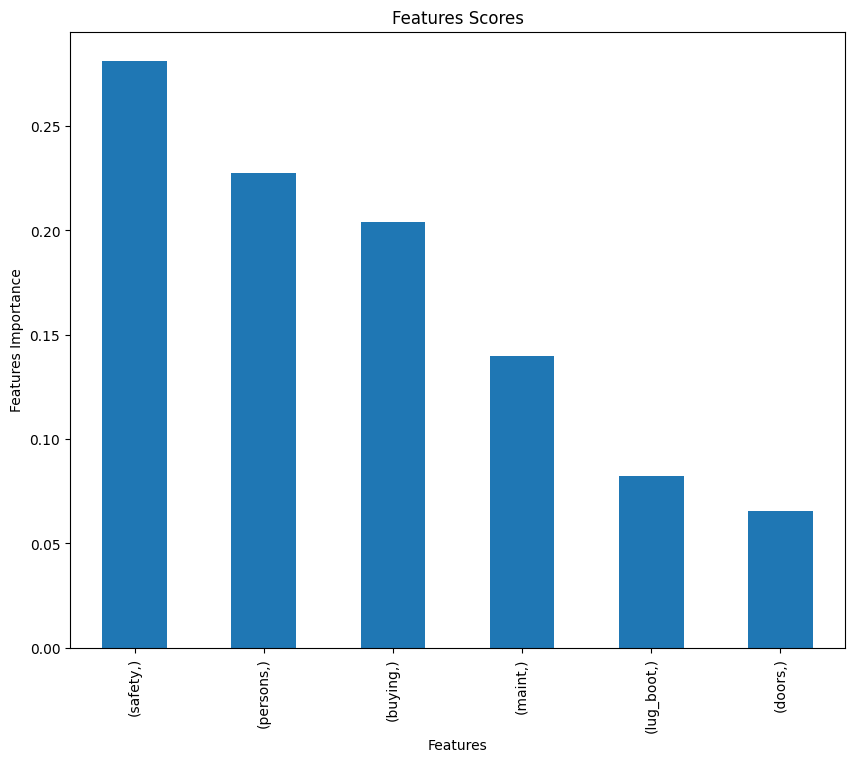

In [72]:
feature_scores = pd.Series(model_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores.plot(kind='bar', figsize=(10,8))
plt.title("Features Scores")
plt.xlabel('Features')
plt.ylabel('Features Importance')
plt.show()

In [73]:
X = data.drop(['doors','class'], axis=1)
y = data['class']

<ipython-input-73-ff8f6d4951e0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop(['doors','class'], axis=1)


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
# Specify the columns to encode
columns_to_encode = ['buying', 'maint', 'persons', 'lug_boot', 'safety']

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder on the training data and transform it
X_train[columns_to_encode] = encoder.fit_transform(X_train[columns_to_encode])

# Transform the test data
X_test[columns_to_encode] = encoder.transform(X_test[columns_to_encode])

In [80]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.930635838150289
[[ 67   4   4   2]
 [  0  10   0   5]
 [  4   0 233   0]
 [  4   1   0  12]]
              precision    recall  f1-score   support

         acc       0.89      0.87      0.88        77
        good       0.67      0.67      0.67        15
       unacc       0.98      0.98      0.98       237
       vgood       0.63      0.71      0.67        17

    accuracy                           0.93       346
   macro avg       0.79      0.81      0.80       346
weighted avg       0.93      0.93      0.93       346

